In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/IA 2/Proyecto IA2/PlantVillage'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/IA 2/Proyecto IA2/PlantVillage/PlantVillage/Potato___Early_blight/24a34259-1c47-4e87-ac83-5decf37b42e4___RS_Early.B 6896.JPG
/content/drive/MyDrive/IA 2/Proyecto IA2/PlantVillage/PlantVillage/Potato___Early_blight/53de9716-fcc5-4241-9e8d-21792a5cf226___RS_Early.B 9014.JPG
/content/drive/MyDrive/IA 2/Proyecto IA2/PlantVillage/PlantVillage/Potato___Early_blight/0ede4acd-3685-40d9-b52b-7b3cb6536fa8___RS_Early.B 7377.JPG
/content/drive/MyDrive/IA 2/Proyecto IA2/PlantVillage/PlantVillage/Potato___Early_blight/3e7543bc-4792-4b65-afd9-f9ccd52b7319___RS_Early.B 8571.JPG
/content/drive/MyDrive/IA 2/Proyecto IA2/PlantVillage/PlantVillage/Potato___Early_blight/1d301622-e359-49d5-b4ca-6837f254fd1b___RS_Early.B 6719.JPG
/content/drive/MyDrive/IA 2/Proyecto IA2/PlantVillage/PlantVillage/Potato___Early_blight/06d9fcc9-4eea-4736-8392-5e483e2e948d___RS_Early.B 7411.JPG
/content/drive/MyDrive/IA 2/Proyecto IA2/PlantVillage/PlantVillage/Potato___Early_blight/37957a08-5b06-49f7-9973

In [ ]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# DL Libraries

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Other libraries
import os
import random
import logging


# Set TensorFlow logging level to error
tf.get_logger().setLevel(logging.ERROR)

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import tensorflow as tf
tf.config.optimizer.set_jit(False)  # Disable XLA

In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Ruta original con carpetas por clase
source_dir = '/content/drive/MyDrive/IA 2/Proyecto IA2/PlantVillage/PlantVillage'

# Directorio destino
base_dir = '/content/drive/MyDrive/IA 2/Proyecto IA2/data_split'
splits = ['train', 'val', 'test']

# Porcentajes de partición
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Crear estructura de carpetas destino
for split in splits:
    for class_name in os.listdir(source_dir):
        os.makedirs(os.path.join(base_dir, split, class_name), exist_ok=True)

# Para cada clase, dividir y mover imágenes
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    images = os.listdir(class_path)
    images = [img for img in images if img.lower().endswith(('.jpg', '.png', '.jpeg'))]
    random.shuffle(images)

    train_imgs, temp_imgs = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

    # Función auxiliar para mover imágenes
    def move_images(img_list, split_name):
        for img in img_list:
            src = os.path.join(class_path, img)
            dst = os.path.join(base_dir, split_name, class_name, img)
            shutil.copy2(src, dst)

    move_images(train_imgs, 'train')
    move_images(val_imgs, 'val')
    move_images(test_imgs, 'test')

print("✅ Imágenes separadas exitosamente en train, val y test.")


✅ Imágenes separadas exitosamente en train, val y test.


In [ ]:
import os

# Ruta base donde están los splits
base_dir = '/content/drive/MyDrive/IA 2/Proyecto IA2/data_split'

# Extensiones que consideramos como imágenes
image_extensions = ('.jpg', '.jpeg', '.png')

# Diccionarios para almacenar conteos
counts_per_split = {}
counts_per_class = {'train': {}, 'val': {}, 'test': {}}

# Recorremos cada split
for split in ['train', 'val', 'test']:
    split_dir = os.path.join(base_dir, split)
    total_split = 0

    # Para cada clase dentro de ese split
    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Contar archivos con extensiones de imagen
        imgs = [f for f in os.listdir(class_dir)
                if f.lower().endswith(image_extensions)]
        num_imgs = len(imgs)
        counts_per_class[split][class_name] = num_imgs
        total_split += num_imgs

    counts_per_split[split] = total_split

# Imprimir resultados
print("📊 Cantidad de imágenes por split (total):")
for split, total in counts_per_split.items():
    print(f"  {split}: {total}")

print("\n📂 Cantidad de imágenes por clase en cada split:")
for split, class_counts in counts_per_class.items():
    print(f"\n{split}:")
    for class_name, cnt in class_counts.items():
        print(f"  {class_name}: {cnt}")


📊 Cantidad de imágenes por split (total):
  train: 1504
  val: 323
  test: 325

📂 Cantidad de imágenes por clase en cada split:

train:
  Potato___Early_blight: 699
  Potato___Late_blight: 699
  Potato___healthy: 106

val:
  Potato___Early_blight: 150
  Potato___Late_blight: 150
  Potato___healthy: 23

test:
  Potato___Early_blight: 151
  Potato___Late_blight: 151
  Potato___healthy: 23


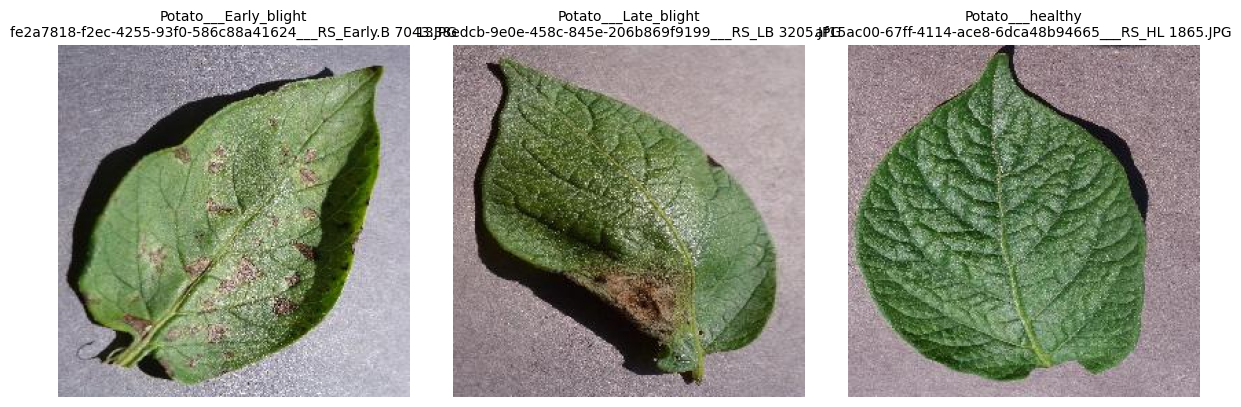

In [ ]:
import os
import random
import matplotlib.pyplot as plt

# Ruta al directorio
train_dir = '/content/drive/MyDrive/IA 2/Proyecto IA2/data_split/train'

# Obtener lista de clases (subdirectorios)
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Preparar figura: una columna por clase
num_classes = len(classes)
fig, axes = plt.subplots(1, num_classes, figsize=(4 * num_classes, 4))
if num_classes == 1:
    axes = [axes]  # Asegurar que axes sea iterable si sólo hay una clase

for ax, cls in zip(axes, classes):
    class_path = os.path.join(train_dir, cls)
    # Listar solo archivos de imagen
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not images:
        ax.set_title(f"{cls}\n(No hay imágenes)")
        ax.axis('off')
        continue

    # Seleccionar una imagen aleatoria
    img_name = random.choice(images)
    img_path = os.path.join(class_path, img_name)

    # Cargar y mostrar
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"{cls}\n{img_name}", fontsize=10)

plt.tight_layout()
plt.show()


### Modelo


In [ ]:
import os
import numpy as np
import random

from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    GlobalAveragePooling2D, Dropout, Dense
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
base_dir = '/content/drive/MyDrive/IA 2/Proyecto IA2/data_split'
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

In [ ]:
batch_size = 16
input_size = (224, 224)   # <-- Asegúrate de que sea (224,224) en todo el pipeline
num_classes = 3

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1504 images belonging to 3 classes.
Found 323 images belonging to 3 classes.
Found 325 images belonging to 3 classes.


In [ ]:
train_labels = train_generator.classes
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(num_classes),
    y=train_labels
)
class_weights = {i: w for i, w in enumerate(class_weights_array)}
print("Indices clases:", train_generator.class_indices)
print("Class weights   :", class_weights)

Indices clases: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}
Class weights   : {0: np.float64(0.7172150691463997), 1: np.float64(0.7172150691463997), 2: np.float64(4.729559748427673)}


EfficientNetB3

In [ ]:
base_model = EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size[0], input_size[1], 3)
)
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 224, 224,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 224, 224,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        960 │ block1a_se_excit

 Total params: 12,360,498 (47.15 MB)

 Trainable params: 1,576,963 (6.02 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)
checkpoint = ModelCheckpoint(
    'best_enetb3_head.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

In [ ]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

history_head = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=8,
    class_weight=class_weights,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

Epoch 1/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.3468 - loss: 1.3780
Epoch 1: val_loss improved from inf to 1.15869, saving model to best_enetb3_head.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 69s 374ms/step - accuracy: 0.3470 - loss: 1.3771 - val_accuracy: 0.3875 - val_loss: 1.1587 - learning_rate: 0.0010
Epoch 2/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.3782 - loss: 1.1325
Epoch 2: val_loss improved from 1.15869 to 0.97627, saving model to best_enetb3_head.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 273ms/step - accuracy: 0.3787 - loss: 1.1323 - val_accuracy: 0.7281 - val_loss: 0.9763 - learning_rate: 0.0010
Epoch 3/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.4789 - loss: 1.0431
Epoch 3: val_loss did not improve from 0.97627
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 273ms/step - accuracy: 0.4785 - loss: 1.0436 - val_accuracy: 0.0812 - val_loss: 1.1159 - learning_rate: 0.0010
Epoch 4/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.5328 - loss: 1.0065
Epoch 4: 

In [ ]:
tf.keras.backend.clear_session()

# Volver a cargar EfficientNetB3 y las capas personalizadas EXACTAS
base_model = EfficientNetB3(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size[0], input_size[1], 3)
)
# Descongelar sólo las últimas 20 capas
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Reconstruir la “cabeza” encima
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        960 │ block1a_se_excit

 Total params: 12,360,498 (47.15 MB)

 Trainable params: 4,950,115 (18.88 MB)

 Non-trainable params: 7,410,383 (28.27 MB)

In [ ]:
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=20,
    class_weight=class_weights,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.3786 - loss: 1.0710
Epoch 1: val_loss did not improve from 0.91913
94/94 ━━━━━━━━━━━━━━━━━━━━ 73s 370ms/step - accuracy: 0.3794 - loss: 1.0710 - val_accuracy: 0.0719 - val_loss: 1.1675 - learning_rate: 1.0000e-05
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.4754 - loss: 1.0827
Epoch 2: val_loss did not improve from 0.91913
94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 265ms/step - accuracy: 0.4755 - loss: 1.0825 - val_accuracy: 0.0719 - val_loss: 1.1543 - learning_rate: 1.0000e-05
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.5363 - loss: 1.0408
Epoch 3: val_loss did not improve from 0.91913
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 272ms/step - accuracy: 0.5363 - loss: 1.0409 - val_accuracy: 0.1937 - val_loss: 1.1097 - learning_rate: 1.0000e-05
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.5435 - loss: 1.0581
Epoch 4: val_loss did not improve from 0.91913
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s

In [ ]:
# Evaluate the model
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
test_steps = test_generator.samples // batch_size

eval_results = model.evaluate(test_generator, steps=test_steps, verbose=1)
print(f"Test loss: {eval_results[0]:.4f}  Test acc: {eval_results[1]:.4f}")


Found 325 images belonging to 3 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.8648 - loss: 0.7498
Test loss: 0.8066  Test acc: 0.7875


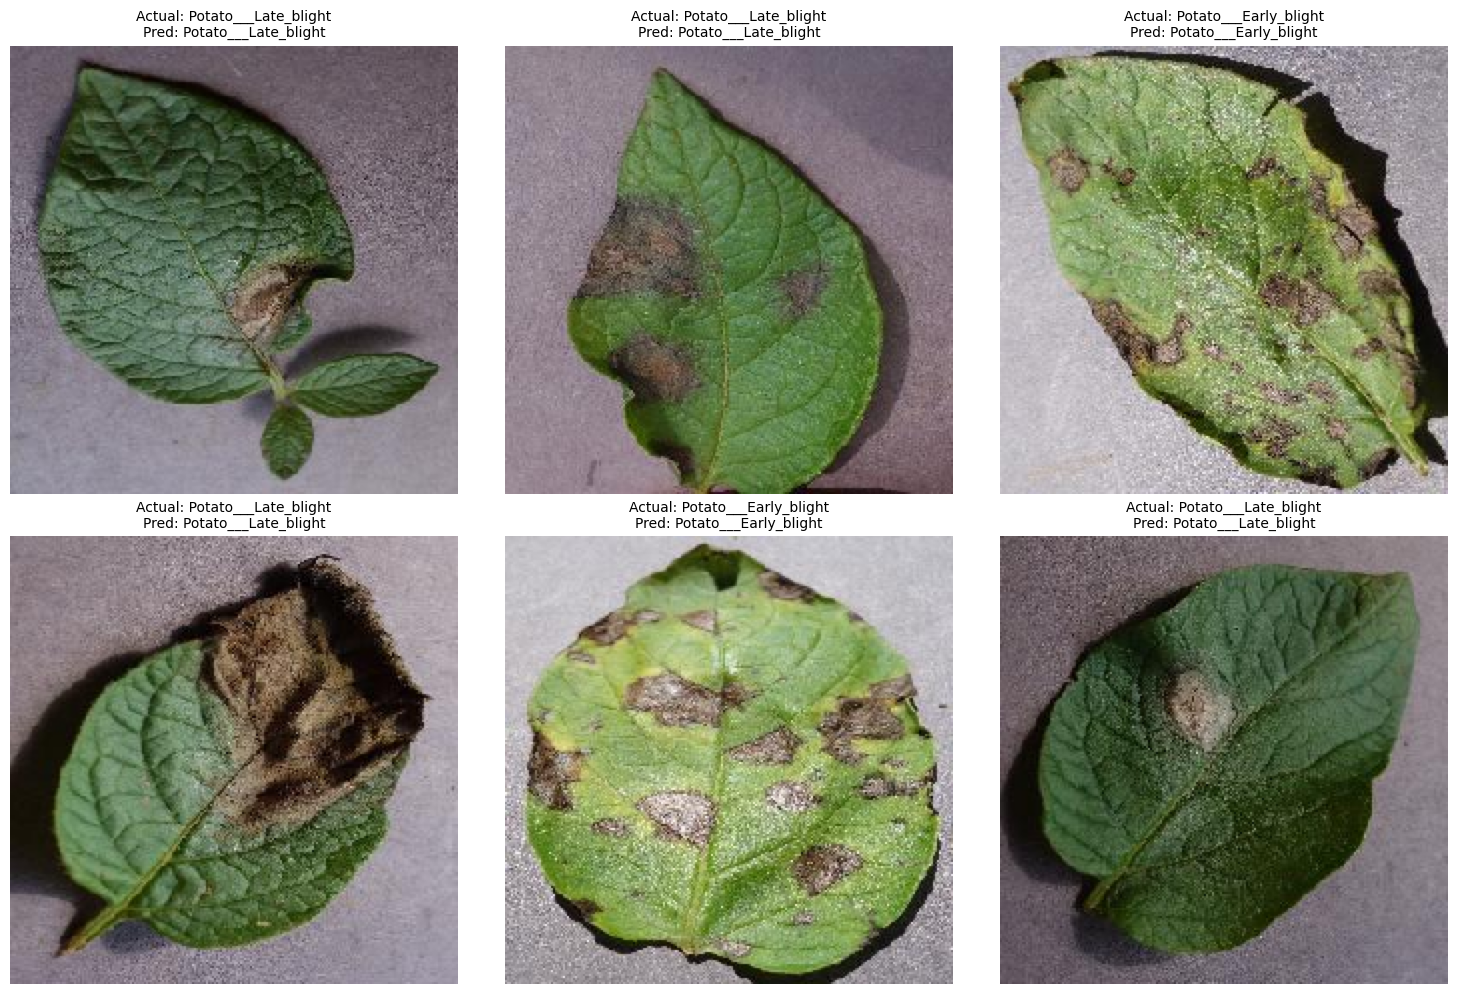

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Parámetros para la visualización
# ----------------------------------------------------
# Número de imágenes que quieres visualizar (máximo 6 para una grilla 2×3)
num_display = 6

# Obtener lista de nombres de clase desde el generator de validación
classes = list(validation_generator.class_indices.keys())

# Total de imágenes en validación y tamaño de lote
total_val = validation_generator.samples
batch_size = validation_generator.batch_size

# ----------------------------------------------------
# 1) Elegir índices aleatorios de imágenes dentro del conjunto de validación
# ----------------------------------------------------
random_indices = random.sample(range(total_val), num_display)

# ----------------------------------------------------
# 2) Crear la figura con subplots 2×3
# ----------------------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# ----------------------------------------------------
# 3) Para cada índice aleatorio, calcular en qué batch está y la posición dentro del batch
# ----------------------------------------------------
for ax, idx in zip(axes, random_indices):
    # Determinar el índice de batch y la posición dentro de ese batch
    batch_idx = idx // batch_size
    idx_in_batch = idx % batch_size

    # Generar (x_batch, y_batch) para ese batch específico
    x_batch, y_batch = validation_generator[batch_idx]
    # x_batch.shape → (batch_size, 224, 224, 3)
    # y_batch.shape → (batch_size, num_classes)

    # Extraer la imagen y la etiqueta real de esa posición
    image = x_batch[idx_in_batch]
    actual_label = classes[np.argmax(y_batch[idx_in_batch])]

    # ------------------------------------------------
    # 4) Predicción con el modelo
    # ------------------------------------------------
    # Expandir las dimensiones para que shape → (1, 224, 224, 3)
    img_for_pred = np.expand_dims(image, axis=0)
    pred_probs = model.predict(img_for_pred, verbose=0)
    predicted_label = classes[np.argmax(pred_probs)]

    # ------------------------------------------------
    # 5) Mostrar la imagen con su etiqueta real y predicha
    # ------------------------------------------------
    ax.imshow(image)
    ax.set_title(f"Actual: {actual_label}\nPred: {predicted_label}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()


# **Plotting the Graph**

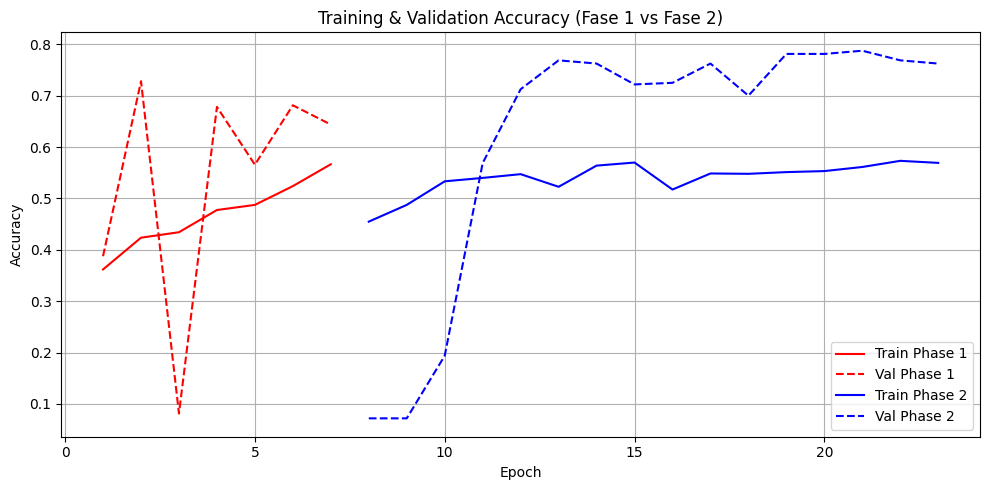

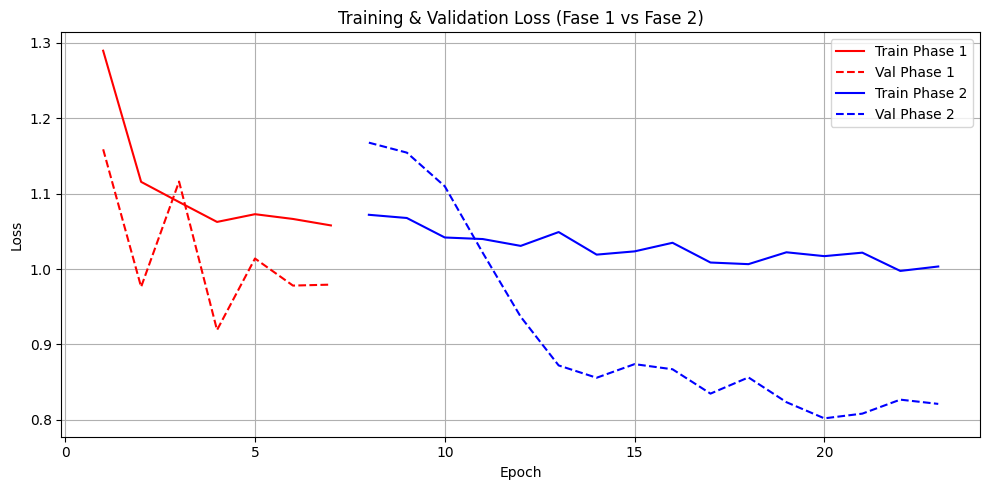

In [ ]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Extraer métricas de las dos fases de entrenamiento
# ------------------------------------------------------------
# Fase 1: entrenamiento de la “cabeza”
acc1      = history_head.history['accuracy']
val_acc1  = history_head.history['val_accuracy']
loss1     = history_head.history['loss']
val_loss1 = history_head.history['val_loss']

# Fase 2: fine-tuning (últimas 20 capas de EfficientNetB3)
acc2      = history_finetune.history['accuracy']
val_acc2  = history_finetune.history['val_accuracy']
loss2     = history_finetune.history['loss']
val_loss2 = history_finetune.history['val_loss']

# ------------------------------------------------------------
# 2) Crear ejes de épocas para cada fase
# ------------------------------------------------------------
# Si la fase 1 tuvo N1 épocas y la fase 2 tuvo N2 épocas:
N1 = len(acc1)
N2 = len(acc2)

# Rango de épocas: 1…N1 para fase 1, y (N1+1)…(N1+N2) para fase 2
epochs1 = range(1, N1 + 1)
epochs2 = range(N1 + 1, N1 + N2 + 1)

# ------------------------------------------------------------
# 3) Graficar Training y Validation Accuracy combinando fases
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
# Fase 1 (cabeza)
plt.plot(epochs1,     acc1,     'r-',  label='Train Phase 1')
plt.plot(epochs1,     val_acc1, 'r--', label='Val Phase 1')
# Fase 2 (fine-tuning)
plt.plot(epochs2,     acc2,     'b-',  label='Train Phase 2')
plt.plot(epochs2,     val_acc2, 'b--', label='Val Phase 2')

plt.title('Training & Validation Accuracy (Fase 1 vs Fase 2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 4) Graficar Training y Validation Loss combinando fases
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
# Fase 1 (cabeza)
plt.plot(epochs1,     loss1,     'r-',  label='Train Phase 1')
plt.plot(epochs1,     val_loss1, 'r--', label='Val Phase 1')
# Fase 2 (fine-tuning)
plt.plot(epochs2,     loss2,     'b-',  label='Train Phase 2')
plt.plot(epochs2,     val_loss2, 'b--', label='Val Phase 2')

plt.title('Training & Validation Loss (Fase 1 vs Fase 2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
